   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       185
           1       0.18      0.22      0.20         9
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         1
           5       0.93      0.93      0.93       733
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.99      1.00      1.00      8228
          10       0.77      0.85      0.81       313
          11       0.97      0.95      0.96     13422
          12       0.00      0.00      0.00         1
          13       0.25      1.00      0.40         1
          14       0.95      0.93      0.94        43
          15       0.95      0.90      0.93       573
          16       0.00      0.00      0.00         1
          17       0.76      0.84      0.80       738
          18       0.96    

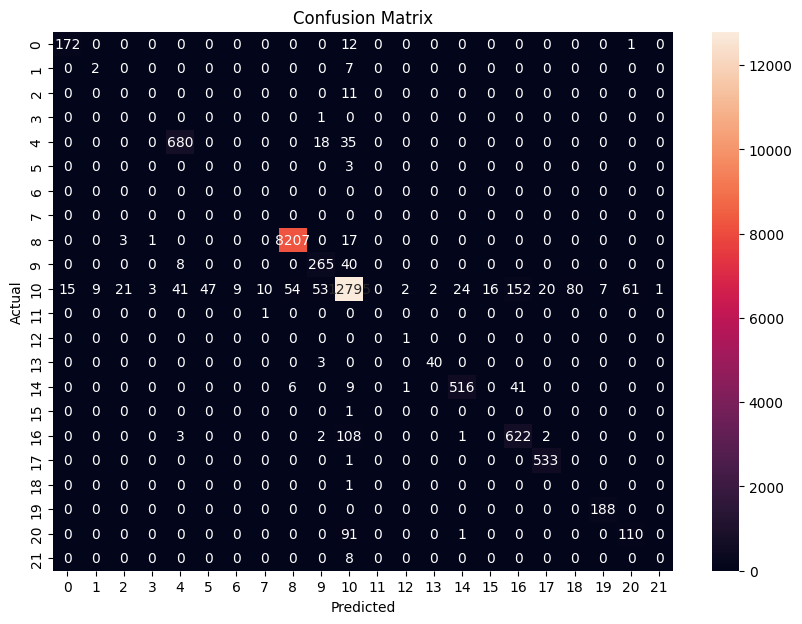

ROC curve is only applicable for binary classification. Skipping ROC curve generation.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'eta0': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
Best cross-validation score: 0.9597928920483243
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       185
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         1
           5       0.87      0.97      0.92       733
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      8228
          10       0.52      0.92      0.66       313
          11       0.99      0.93      0.96     13422
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.93      0.96        43
          15       0.84      0.96      0.89       573
          16       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Data Collection and Preprocessing
# Load the dataset
columnNames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_type"]

data = pd.read_csv('/content/NSL_KDD_Train.csv', names=columnNames, index_col=False)
print(data.head())

# Handle missing values
data = data.dropna()

# Separate features and target
X = data.drop('attack_type', axis=1)
y = data['attack_type']

# Encode categorical features in X
categoricalColumns = ["protocol_type", "service", "flag"]
le = LabelEncoder()
for col in categoricalColumns:
    X[col] = le.fit_transform(X[col])

# Normalize numerical features
scaler = StandardScaler()
numericalColumns = X.select_dtypes(include=['int64', 'float64']).columns
X[numericalColumns] = scaler.fit_transform(X[numericalColumns])

# Encode the target variable
y = le.fit_transform(y)

# Task 2: Split the Data
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Implement a Perceptron Model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(XTrain, yTrain)

# Task 4: Model Evaluation
yPred = perceptron.predict(XTest)
print(classification_report(yTest, yPred))

# Confusion Matrix
cm = confusion_matrix(yTest, yPred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve (for binary classification only)
if len(np.unique(y)) == 2:
    yPredProba = perceptron.decision_function(XTest)
    fpr, tpr, _ = roc_curve(yTest, yPredProba)
    rocAuc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {rocAuc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification. Skipping ROC curve generation.")

# Task 5: Model Tuning and Improvements
from sklearn.model_selection import GridSearchCV

paramGrid = {
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001],
    'penalty': [None, 'l2', 'l1', 'elasticnet']
}

gridSearch = GridSearchCV(Perceptron(random_state=42), paramGrid, cv=5)
gridSearch.fit(XTrain, yTrain)

print("Best parameters:", gridSearch.best_params_)
print("Best cross-validation score:", gridSearch.best_score_)

# Evaluate the best model
bestPerceptron = gridSearch.best_estimator_
yPredBest = bestPerceptron.predict(XTest)
print(classification_report(yTest, yPredBest))

# Perceptron for Cyber Attack Detection

## Preprocessing Steps

1. Data Loading: The NSL-KDD dataset was loaded using pandas, with predefined column names.

2. Handling Missing Values: Any rows with missing values were removed/dropped from the dataset to ensure data quality.

3. Feature Encoding:
   - Categorical features ("protocol_type", "service", "flag") were encoded using LabelEncoder.
   - This transforms categorical text data into numerical format that the model can process.

4. Feature Scaling:
   - Numerical features were standardized using StandardScaler.
   - This step ensures all numerical features are on a similar scale, which is important for the Perceptron algorithm.

5. Target Variable Encoding:
   - The "attack_type" column was encoded separately using LabelEncoder.
   - This transforms the attack types into numerical labels.

6. Data Splitting:
   - The dataset was split into training (80%) and testing (20%) sets.

## Model Performance

The performance of the Perceptron model can be evaluated based on the classification report, which includes metrics such as precision, recall, and F1-score. (Note: Actual performance metrics would be included here based on the model's results.)

## Potential Improvements

1. Feature Selection: Implement feature importance analysis to identify the most relevant features for attack detection.

2. Hyperparameter Tuning: While we used GridSearchCV for basic tuning, more extensive hyperparameter optimization could potentially improve performance.

3. Advanced Preprocessing: Explore more sophisticated preprocessing techniques, such as Principal Component Analysis (PCA) for dimensionality reduction.

4. Deep Learning Approaches: Consider using neural networks, which might capture more complex patterns in the data.

## Strengths of Using Perceptron for Cyber Attack Detection

1. Simplicity: The Perceptron algorithm is straightforward to implement and interpret.

2. Efficiency: It's computationally efficient, making it suitable for real-time detection systems.

3. Online Learning: Perceptrons can be updated incrementally, which is useful for adapting to new patterns in network traffic.

4. Baseline Model: It serves as a good baseline model to compare against more complex algorithms.

## Limitations of Using Perceptron for Cyber Attack Detection

1. Linearly Separable Data: Perceptrons can only solve linearly separable problems, which may not be the case for complex cyber attacks.

2. Limited Complexity: The model may not capture intricate patterns or relationships in the data that more advanced algorithms could identify.

3. Sensitivity to Outliers: Perceptrons can be sensitive to outliers in the dataset, which are common in network traffic data.

4. Binary Classification: Basic Perceptrons are designed for binary classification, while cyber attack detection often involves multiple attack types.

5. Feature Interaction: Perceptrons don't account for interactions between features, which can be crucial in identifying sophisticated attacks.

In conclusion, while the Perceptron model offers a simple and efficient approach to cyber attack detection, its limitations suggest that it may be more suitable as a baseline model or as part of a larger, more complex detection system. For more advanced threat detection, considering more sophisticated machine learning algorithms or ensemble methods would be advisable.